In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

30860


In [2]:
import numpy as np
from cellpose import models, utils
import os
import sys
import torch
import cv2
import h5py 
import ast

import pandas as pd
sys.path.append(r"..\..\..\..\Documents")
from ImageAnalysis3.io_tools.crop import generate_neighboring_crop
from skimage.segmentation import random_walker

channel_2_th = {
    '750':1000,
    '647':1500,
}
overwrite=False
torch.cuda.set_device('cuda:0')

print(os.getpid())

creating new log file
2022-01-16 19:41:15,476 [INFO] WRITING LOG OUTPUT TO C:\Users\puzheng\.cellpose\run.log
30860


In [3]:
save_folder = r'\\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only'
save_filenames = [os.path.join(save_folder, _fl) for _fl in os.listdir(save_folder)
                  if _fl.split(os.extsep)[-1]=='hdf5']
print(len(save_filenames))
segmentation_folder = os.path.join(save_folder, 'Segmentation')
if not os.path.exists(segmentation_folder):
    os.makedirs(segmentation_folder)
cand_spots_folder = os.path.join(save_folder, 'CandSpots')
if not os.path.exists(cand_spots_folder):
    os.makedirs(cand_spots_folder)

30


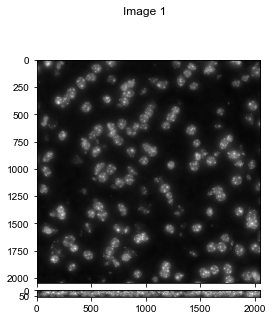

2022-01-16 15:42:37,734 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 15:42:37,734 [INFO] >>>> using GPU
2022-01-16 15:42:37,953 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 15:42:37,953 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 15:42:39,502 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 15:43:02,232 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.38it/s]
2022-01-16 15:43:03,137 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 15:43:07,689 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 15.33it/s]


2022-01-16 15:43:21,922 [INFO] 30%|##9       | 24/81 [00:01<00:03, 15.35it/s]


2022-01-16 15:43:25,699 [INFO] 100%|##########| 81/81 [00:05<00:00, 15.08it/s]
2022-01-16 15:43:26,859 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 15:43:37,064 [INFO] 81%|########1 | 66/81 [00:04<00:00, 15.31it/s]


2022-01-16 15:43:49,359 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.98it/s]
2022-01-16 15:43:50,656 [INFO] network run in 71.94s
2022-01-16 15:44:16,313 [INFO] masks created in 25.66s
2022-01-16 15:44:20,844 [INFO] >>>> TOTAL TIME 102.89 sec
-- finish segmentation in 103.610s. 


C:\Users\puzheng\anaconda3\envs\ia3\lib\site-packages\skimage\segmentation\random_walker_segmentation.py:470: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_05_Segmentation.npy
-- removing segmentation_masks from class


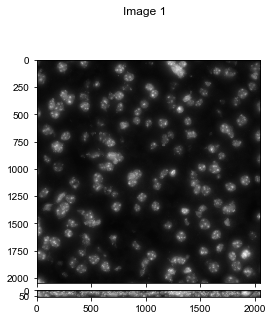

2022-01-16 15:44:33,750 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 15:44:33,750 [INFO] >>>> using GPU
2022-01-16 15:44:33,916 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 15:44:33,916 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 15:44:35,344 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 15:44:53,938 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.45it/s]
2022-01-16 15:44:54,657 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 15:44:59,111 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 15.30it/s]


2022-01-16 15:45:13,251 [INFO] 27%|##7       | 22/81 [00:01<00:03, 14.87it/s]


2022-01-16 15:45:17,177 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.97it/s]
2022-01-16 15:45:18,313 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 15:45:28,391 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.98it/s]


2022-01-16 15:45:40,798 [INFO] 100%|##########| 81/81 [00:05<00:00, 15.04it/s]
2022-01-16 15:45:42,016 [INFO] network run in 67.41s
2022-01-16 15:46:07,521 [INFO] masks created in 25.50s
2022-01-16 15:46:12,048 [INFO] >>>> TOTAL TIME 98.13 sec
-- finish segmentation in 98.704s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_06_Segmentation.npy
-- removing segmentation_masks from class


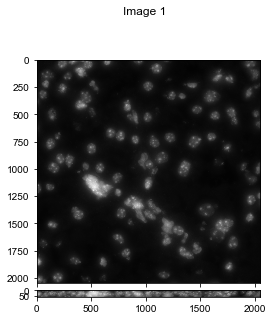

2022-01-16 15:46:24,517 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 15:46:24,517 [INFO] >>>> using GPU
2022-01-16 15:46:24,673 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 15:46:24,673 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 15:46:26,251 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 15:46:44,861 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.44it/s]
2022-01-16 15:46:45,610 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 15:46:50,017 [INFO] 78%|#######7  | 63/81 [00:04<00:01, 15.22it/s]


2022-01-16 15:47:04,267 [INFO] 27%|##7       | 22/81 [00:01<00:03, 14.97it/s]


2022-01-16 15:47:08,211 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.88it/s]
2022-01-16 15:47:09,345 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 15:47:19,642 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.54it/s]


2022-01-16 15:47:32,223 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.81it/s]
2022-01-16 15:47:33,517 [INFO] network run in 68.13s
2022-01-16 15:47:57,908 [INFO] masks created in 24.39s
2022-01-16 15:48:02,760 [INFO] >>>> TOTAL TIME 98.09 sec
-- finish segmentation in 98.657s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_07_Segmentation.npy
-- removing segmentation_masks from class


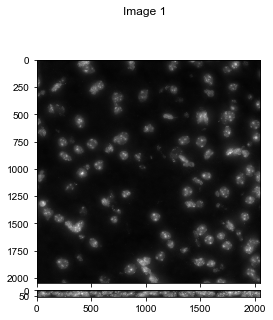

2022-01-16 15:48:16,018 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 15:48:16,018 [INFO] >>>> using GPU
2022-01-16 15:48:16,174 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 15:48:16,174 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 15:48:17,705 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 15:48:36,455 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.42it/s]
2022-01-16 15:48:37,268 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 15:48:41,799 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.62it/s]


2022-01-16 15:48:56,205 [INFO] 30%|##9       | 24/81 [00:01<00:03, 14.87it/s]


2022-01-16 15:49:00,041 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.84it/s]
2022-01-16 15:49:01,236 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 15:49:11,674 [INFO] 81%|########1 | 66/81 [00:04<00:01, 14.53it/s]


2022-01-16 15:49:24,096 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.81it/s]
2022-01-16 15:49:25,377 [INFO] network run in 68.49s
2022-01-16 15:49:49,018 [INFO] masks created in 23.63s
2022-01-16 15:49:53,752 [INFO] >>>> TOTAL TIME 97.58 sec
-- finish segmentation in 98.172s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_08_Segmentation.npy
-- removing segmentation_masks from class


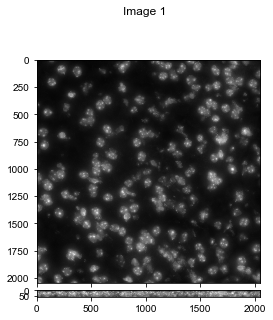

2022-01-16 15:50:06,909 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 15:50:06,909 [INFO] >>>> using GPU
2022-01-16 15:50:07,065 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 15:50:07,065 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 15:50:08,596 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 15:50:27,362 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.42it/s]
2022-01-16 15:50:28,143 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 15:50:32,659 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 15.03it/s]


2022-01-16 15:50:47,112 [INFO] 30%|##9       | 24/81 [00:01<00:03, 14.73it/s]


2022-01-16 15:50:50,941 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.82it/s]
2022-01-16 15:50:52,140 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 15:51:02,503 [INFO] 80%|########  | 65/81 [00:04<00:01, 14.84it/s]


2022-01-16 15:51:15,145 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.60it/s]
2022-01-16 15:51:16,425 [INFO] network run in 68.61s
2022-01-16 15:51:44,878 [INFO] masks created in 28.45s
2022-01-16 15:51:49,590 [INFO] >>>> TOTAL TIME 102.52 sec
-- finish segmentation in 103.095s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_09_Segmentation.npy
-- removing segmentation_masks from class


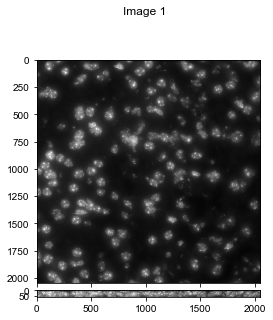

2022-01-16 15:52:02,941 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 15:52:02,941 [INFO] >>>> using GPU
2022-01-16 15:52:03,083 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 15:52:03,083 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 15:52:04,628 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 15:52:23,410 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.40it/s]
2022-01-16 15:52:24,191 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 15:52:28,691 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.82it/s]


2022-01-16 15:52:43,118 [INFO] 30%|##9       | 24/81 [00:01<00:03, 14.67it/s]


2022-01-16 15:52:46,940 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.81it/s]
2022-01-16 15:52:48,129 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 15:52:58,380 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.59it/s]


2022-01-16 15:53:11,066 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.56it/s]
2022-01-16 15:53:12,379 [INFO] network run in 68.53s
2022-01-16 15:53:37,317 [INFO] masks created in 24.94s
2022-01-16 15:53:41,832 [INFO] >>>> TOTAL TIME 98.75 sec
-- finish segmentation in 99.298s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_10_Segmentation.npy
-- removing segmentation_masks from class


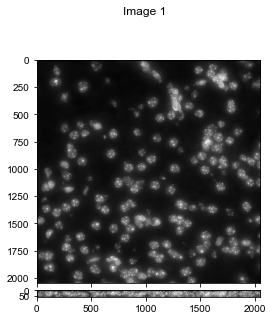

2022-01-16 15:53:54,488 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 15:53:54,488 [INFO] >>>> using GPU
2022-01-16 15:53:54,662 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 15:53:54,663 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 15:53:56,067 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 15:54:14,723 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.44it/s]
2022-01-16 15:54:15,473 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 15:54:19,958 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.80it/s]


2022-01-16 15:54:34,208 [INFO] 27%|##7       | 22/81 [00:01<00:04, 14.75it/s]


2022-01-16 15:54:38,149 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.89it/s]
2022-01-16 15:54:39,286 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 15:54:49,442 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.89it/s]


2022-01-16 15:55:01,946 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.89it/s]
2022-01-16 15:55:03,161 [INFO] network run in 67.81s
2022-01-16 15:55:29,112 [INFO] masks created in 25.95s
2022-01-16 15:55:33,567 [INFO] >>>> TOTAL TIME 98.91 sec
-- finish segmentation in 99.438s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_11_Segmentation.npy
-- removing segmentation_masks from class


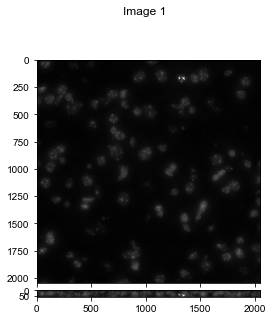

2022-01-16 15:55:45,979 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 15:55:45,980 [INFO] >>>> using GPU
2022-01-16 15:55:46,130 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 15:55:46,130 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 15:55:47,562 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 15:56:06,179 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.44it/s]
2022-01-16 15:56:06,901 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 15:56:11,396 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.76it/s]


2022-01-16 15:56:25,740 [INFO] 30%|##9       | 24/81 [00:01<00:03, 15.16it/s]


2022-01-16 15:56:29,554 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.93it/s]
2022-01-16 15:56:30,740 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 15:56:41,040 [INFO] 81%|########1 | 66/81 [00:04<00:01, 14.87it/s]


2022-01-16 15:56:53,476 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.83it/s]
2022-01-16 15:56:54,692 [INFO] network run in 67.86s
2022-01-16 15:57:15,563 [INFO] masks created in 20.87s
2022-01-16 15:57:19,984 [INFO] >>>> TOTAL TIME 93.85 sec
-- finish segmentation in 94.398s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_12_Segmentation.npy
-- removing segmentation_masks from class


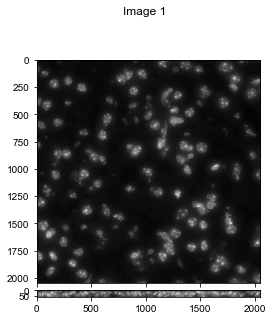

2022-01-16 15:57:32,592 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 15:57:32,592 [INFO] >>>> using GPU
2022-01-16 15:57:32,751 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 15:57:32,751 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 15:57:34,173 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 15:57:52,787 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.44it/s]
2022-01-16 15:57:53,522 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 15:57:58,009 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.94it/s]


2022-01-16 15:58:12,294 [INFO] 30%|##9       | 24/81 [00:01<00:03, 14.94it/s]


2022-01-16 15:58:16,104 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.88it/s]
2022-01-16 15:58:17,339 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 15:58:27,627 [INFO] 81%|########1 | 66/81 [00:04<00:00, 15.03it/s]


2022-01-16 15:58:40,104 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.73it/s]
2022-01-16 15:58:41,331 [INFO] network run in 67.88s
2022-01-16 15:59:04,005 [INFO] masks created in 22.67s
2022-01-16 15:59:08,505 [INFO] >>>> TOTAL TIME 95.75 sec
-- finish segmentation in 96.264s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_13_Segmentation.npy
-- removing segmentation_masks from class


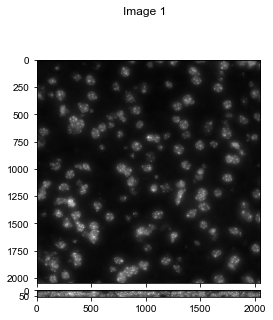

2022-01-16 15:59:21,443 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 15:59:21,443 [INFO] >>>> using GPU
2022-01-16 15:59:21,602 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 15:59:21,602 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 15:59:22,978 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 15:59:41,576 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.44it/s]
2022-01-16 15:59:42,327 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 15:59:46,810 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 15.03it/s]


2022-01-16 16:00:01,144 [INFO] 30%|##9       | 24/81 [00:01<00:03, 14.90it/s]


2022-01-16 16:00:04,948 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.91it/s]
2022-01-16 16:00:06,097 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 16:00:16,365 [INFO] 81%|########1 | 66/81 [00:04<00:01, 14.74it/s]


2022-01-16 16:00:28,868 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.71it/s]
2022-01-16 16:00:30,105 [INFO] network run in 67.79s
2022-01-16 16:00:55,756 [INFO] masks created in 25.65s
2022-01-16 16:01:00,507 [INFO] >>>> TOTAL TIME 98.91 sec
-- finish segmentation in 99.521s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_14_Segmentation.npy
-- removing segmentation_masks from class


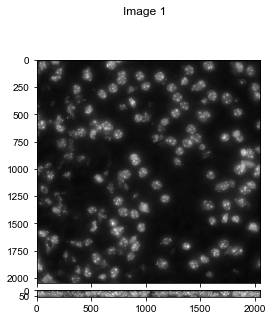

2022-01-16 16:01:14,472 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 16:01:14,472 [INFO] >>>> using GPU
2022-01-16 16:01:14,648 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 16:01:14,648 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 16:01:16,297 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 16:01:35,044 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.41it/s]
2022-01-16 16:01:35,881 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 16:01:40,438 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.78it/s]


2022-01-16 16:01:55,051 [INFO] 30%|##9       | 24/81 [00:01<00:03, 14.88it/s]


2022-01-16 16:01:58,892 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.78it/s]
2022-01-16 16:02:00,201 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 16:02:10,557 [INFO] 81%|########1 | 66/81 [00:04<00:00, 15.06it/s]


2022-01-16 16:02:23,153 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.63it/s]
2022-01-16 16:02:24,472 [INFO] network run in 69.01s
2022-01-16 16:02:50,644 [INFO] masks created in 26.17s
2022-01-16 16:02:55,410 [INFO] >>>> TOTAL TIME 100.76 sec
-- finish segmentation in 101.345s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_15_Segmentation.npy
-- removing segmentation_masks from class


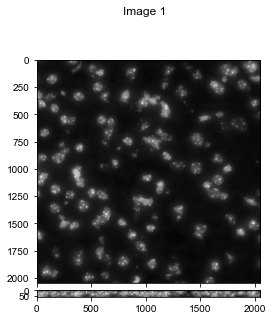

2022-01-16 16:03:08,847 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 16:03:08,847 [INFO] >>>> using GPU
2022-01-16 16:03:08,996 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 16:03:08,996 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 16:03:10,596 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 16:03:29,342 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.43it/s]
2022-01-16 16:03:30,140 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 16:03:34,596 [INFO] 78%|#######7  | 63/81 [00:04<00:01, 15.27it/s]


2022-01-16 16:03:49,017 [INFO] 27%|##7       | 22/81 [00:01<00:03, 14.91it/s]


2022-01-16 16:03:53,002 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.78it/s]
2022-01-16 16:03:54,241 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 16:04:04,520 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.92it/s]


2022-01-16 16:04:17,220 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.81it/s]
2022-01-16 16:04:18,499 [INFO] network run in 68.73s
2022-01-16 16:04:42,961 [INFO] masks created in 24.46s
2022-01-16 16:04:47,741 [INFO] >>>> TOTAL TIME 98.75 sec
-- finish segmentation in 99.330s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_16_Segmentation.npy
-- removing segmentation_masks from class


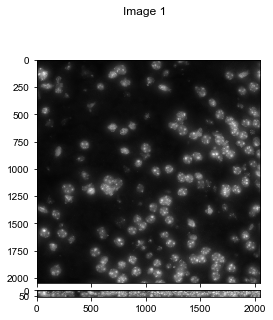

2022-01-16 16:05:00,929 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 16:05:00,929 [INFO] >>>> using GPU
2022-01-16 16:05:01,085 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 16:05:01,085 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 16:05:02,638 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 16:05:21,418 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.43it/s]
2022-01-16 16:05:22,207 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 16:05:26,716 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.83it/s]


2022-01-16 16:05:41,243 [INFO] 30%|##9       | 24/81 [00:01<00:03, 14.68it/s]


2022-01-16 16:05:45,052 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.84it/s]
2022-01-16 16:05:46,275 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 16:05:56,648 [INFO] 81%|########1 | 66/81 [00:04<00:00, 15.26it/s]


2022-01-16 16:06:09,182 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.72it/s]
2022-01-16 16:06:10,438 [INFO] network run in 68.62s
2022-01-16 16:06:35,981 [INFO] masks created in 25.54s
2022-01-16 16:06:40,622 [INFO] >>>> TOTAL TIME 99.54 sec
-- finish segmentation in 100.128s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_17_Segmentation.npy
-- removing segmentation_masks from class


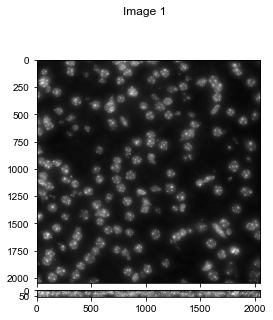

2022-01-16 16:06:53,951 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 16:06:53,951 [INFO] >>>> using GPU
2022-01-16 16:06:54,109 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 16:06:54,109 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 16:06:55,681 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 16:07:14,490 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.43it/s]
2022-01-16 16:07:15,257 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 16:07:19,791 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 15.08it/s]


2022-01-16 16:07:34,235 [INFO] 30%|##9       | 24/81 [00:01<00:03, 14.89it/s]


2022-01-16 16:07:38,052 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.86it/s]
2022-01-16 16:07:39,311 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 16:07:49,555 [INFO] 80%|########  | 65/81 [00:04<00:01, 15.06it/s]


2022-01-16 16:08:02,124 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.69it/s]
2022-01-16 16:08:03,396 [INFO] network run in 68.54s
2022-01-16 16:08:31,736 [INFO] masks created in 28.34s
2022-01-16 16:08:36,403 [INFO] >>>> TOTAL TIME 102.29 sec
-- finish segmentation in 102.859s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_18_Segmentation.npy
-- removing segmentation_masks from class


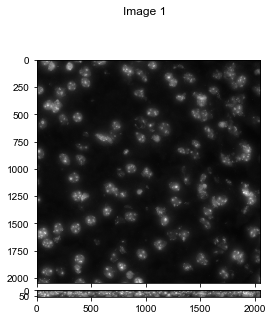

2022-01-16 16:08:49,612 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 16:08:49,612 [INFO] >>>> using GPU
2022-01-16 16:08:49,779 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 16:08:49,780 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 16:08:51,298 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 16:09:10,022 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.44it/s]
2022-01-16 16:09:10,788 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 16:09:15,247 [INFO] 78%|#######7  | 63/81 [00:04<00:01, 15.01it/s]


2022-01-16 16:09:29,716 [INFO] 27%|##7       | 22/81 [00:01<00:03, 15.05it/s]


2022-01-16 16:09:33,688 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.78it/s]
2022-01-16 16:09:34,845 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 16:09:45,083 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.86it/s]


2022-01-16 16:09:57,757 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.65it/s]
2022-01-16 16:09:59,053 [INFO] network run in 68.52s
2022-01-16 16:10:23,764 [INFO] masks created in 24.71s
2022-01-16 16:10:28,469 [INFO] >>>> TOTAL TIME 98.69 sec
-- finish segmentation in 99.279s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_19_Segmentation.npy
-- removing segmentation_masks from class


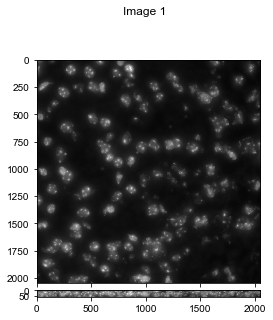

2022-01-16 16:10:41,572 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 16:10:41,572 [INFO] >>>> using GPU
2022-01-16 16:10:41,719 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 16:10:41,719 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 16:10:43,206 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 16:11:01,944 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.41it/s]
2022-01-16 16:11:02,727 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 16:11:07,230 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.90it/s]


2022-01-16 16:11:21,677 [INFO] 30%|##9       | 24/81 [00:01<00:03, 15.05it/s]


2022-01-16 16:11:25,516 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.80it/s]
2022-01-16 16:11:26,752 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 16:11:37,151 [INFO] 81%|########1 | 66/81 [00:04<00:01, 14.92it/s]


2022-01-16 16:11:49,657 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.67it/s]
2022-01-16 16:11:50,993 [INFO] network run in 68.54s
2022-01-16 16:12:14,903 [INFO] masks created in 23.91s
2022-01-16 16:12:19,530 [INFO] >>>> TOTAL TIME 97.81 sec
-- finish segmentation in 98.360s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_20_Segmentation.npy
-- removing segmentation_masks from class


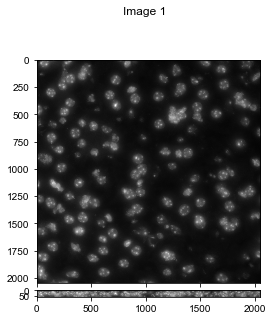

2022-01-16 16:12:32,607 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 16:12:32,607 [INFO] >>>> using GPU
2022-01-16 16:12:32,756 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 16:12:32,756 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 16:12:34,316 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 16:12:52,937 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.45it/s]
2022-01-16 16:12:53,712 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 16:12:58,158 [INFO] 78%|#######7  | 63/81 [00:04<00:01, 14.99it/s]


2022-01-16 16:13:12,476 [INFO] 27%|##7       | 22/81 [00:01<00:03, 15.01it/s]


2022-01-16 16:13:16,452 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.77it/s]
2022-01-16 16:13:17,702 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 16:13:27,939 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.72it/s]


2022-01-16 16:13:40,543 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.82it/s]
2022-01-16 16:13:41,848 [INFO] network run in 68.32s
2022-01-16 16:14:08,391 [INFO] masks created in 26.54s
2022-01-16 16:14:12,957 [INFO] >>>> TOTAL TIME 100.20 sec
-- finish segmentation in 100.745s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_21_Segmentation.npy
-- removing segmentation_masks from class


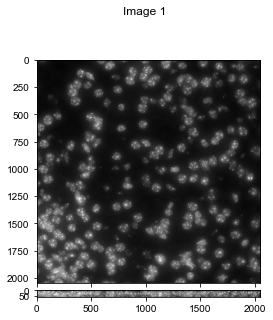

2022-01-16 16:14:26,662 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 16:14:26,662 [INFO] >>>> using GPU
2022-01-16 16:14:26,834 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 16:14:26,834 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 16:14:28,342 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 16:14:47,053 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.42it/s]
2022-01-16 16:14:47,814 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 16:14:52,318 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.86it/s]


2022-01-16 16:15:06,725 [INFO] 30%|##9       | 24/81 [00:01<00:03, 15.08it/s]


2022-01-16 16:15:10,572 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.83it/s]
2022-01-16 16:15:11,758 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 16:15:22,170 [INFO] 81%|########1 | 66/81 [00:04<00:01, 14.57it/s]


2022-01-16 16:15:34,733 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.72it/s]
2022-01-16 16:15:36,046 [INFO] network run in 68.47s
2022-01-16 16:16:05,476 [INFO] masks created in 29.41s
2022-01-16 16:16:10,212 [INFO] >>>> TOTAL TIME 103.38 sec
-- finish segmentation in 103.959s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_22_Segmentation.npy
-- removing segmentation_masks from class


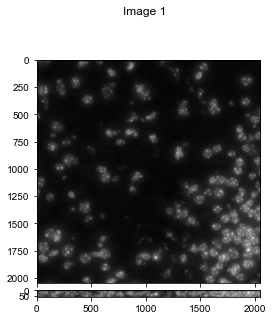

2022-01-16 16:16:23,338 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 16:16:23,338 [INFO] >>>> using GPU
2022-01-16 16:16:23,492 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 16:16:23,492 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 16:16:25,015 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 16:16:43,721 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.42it/s]
2022-01-16 16:16:44,490 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 16:16:49,022 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.99it/s]


2022-01-16 16:17:03,437 [INFO] 30%|##9       | 24/81 [00:01<00:03, 14.88it/s]


2022-01-16 16:17:07,286 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.77it/s]
2022-01-16 16:17:08,526 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 16:17:18,852 [INFO] 81%|########1 | 66/81 [00:04<00:01, 14.93it/s]


2022-01-16 16:17:31,384 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.66it/s]
2022-01-16 16:17:32,643 [INFO] network run in 68.43s
2022-01-16 16:17:57,260 [INFO] masks created in 24.62s
2022-01-16 16:18:01,949 [INFO] >>>> TOTAL TIME 98.46 sec
-- finish segmentation in 99.018s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_23_Segmentation.npy
-- removing segmentation_masks from class


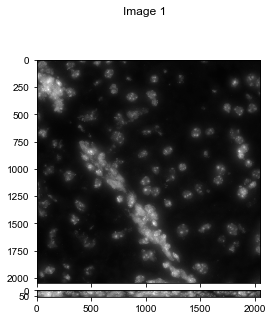

2022-01-16 16:18:14,949 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 16:18:14,949 [INFO] >>>> using GPU
2022-01-16 16:18:15,109 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 16:18:15,124 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 16:18:16,553 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 16:18:35,190 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.44it/s]
2022-01-16 16:18:35,973 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 16:18:40,483 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.86it/s]


2022-01-16 16:18:54,879 [INFO] 30%|##9       | 24/81 [00:01<00:03, 14.75it/s]


2022-01-16 16:18:58,682 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.88it/s]
2022-01-16 16:18:59,934 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 16:19:10,230 [INFO] 81%|########1 | 66/81 [00:04<00:01, 14.82it/s]


2022-01-16 16:19:22,795 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.64it/s]
2022-01-16 16:19:24,065 [INFO] network run in 68.24s
2022-01-16 16:19:47,225 [INFO] masks created in 23.16s
2022-01-16 16:19:51,929 [INFO] >>>> TOTAL TIME 96.82 sec
-- finish segmentation in 97.378s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_24_Segmentation.npy
-- removing segmentation_masks from class


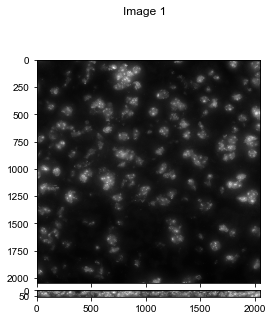

2022-01-16 16:20:05,365 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 16:20:05,365 [INFO] >>>> using GPU
2022-01-16 16:20:05,527 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 16:20:05,527 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 16:20:07,091 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 16:20:25,722 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.43it/s]
2022-01-16 16:20:26,487 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 16:20:30,995 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 15.01it/s]


2022-01-16 16:20:45,398 [INFO] 30%|##9       | 24/81 [00:01<00:03, 14.97it/s]


2022-01-16 16:20:49,235 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.84it/s]
2022-01-16 16:20:50,445 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 16:21:00,780 [INFO] 81%|########1 | 66/81 [00:04<00:00, 15.12it/s]


2022-01-16 16:21:13,278 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.71it/s]
2022-01-16 16:21:14,578 [INFO] network run in 68.30s
2022-01-16 16:21:37,109 [INFO] masks created in 22.53s
2022-01-16 16:21:41,782 [INFO] >>>> TOTAL TIME 96.25 sec
-- finish segmentation in 96.856s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_25_Segmentation.npy
-- removing segmentation_masks from class


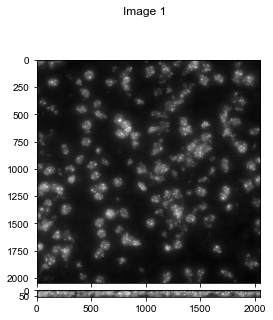

2022-01-16 16:21:54,830 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 16:21:54,830 [INFO] >>>> using GPU
2022-01-16 16:21:54,994 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 16:21:54,994 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 16:21:56,445 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 16:22:14,964 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.47it/s]
2022-01-16 16:22:15,730 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 16:22:20,248 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.92it/s]


2022-01-16 16:22:34,748 [INFO] 30%|##9       | 24/81 [00:01<00:03, 14.89it/s]


2022-01-16 16:22:38,580 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.79it/s]
2022-01-16 16:22:39,766 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 16:22:50,153 [INFO] 81%|########1 | 66/81 [00:04<00:01, 14.96it/s]


2022-01-16 16:23:02,744 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.69it/s]
2022-01-16 16:23:04,024 [INFO] network run in 68.30s
2022-01-16 16:23:28,833 [INFO] masks created in 24.81s
2022-01-16 16:23:33,440 [INFO] >>>> TOTAL TIME 98.45 sec
-- finish segmentation in 99.014s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_26_Segmentation.npy
-- removing segmentation_masks from class


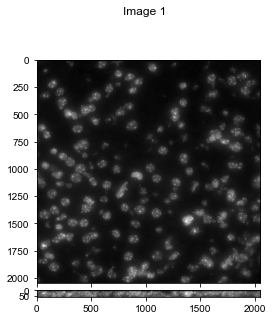

2022-01-16 16:23:46,589 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 16:23:46,589 [INFO] >>>> using GPU
2022-01-16 16:23:46,737 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 16:23:46,737 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 16:23:48,275 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 16:24:06,963 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.40it/s]
2022-01-16 16:24:07,720 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 16:24:12,229 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.81it/s]


2022-01-16 16:24:26,631 [INFO] 30%|##9       | 24/81 [00:01<00:03, 14.98it/s]


2022-01-16 16:24:30,433 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.88it/s]
2022-01-16 16:24:31,652 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 16:24:42,034 [INFO] 81%|########1 | 66/81 [00:04<00:01, 14.73it/s]


2022-01-16 16:24:54,644 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.74it/s]
2022-01-16 16:24:55,918 [INFO] network run in 68.43s
2022-01-16 16:25:21,491 [INFO] masks created in 25.57s
2022-01-16 16:25:26,178 [INFO] >>>> TOTAL TIME 99.44 sec
-- finish segmentation in 99.997s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_27_Segmentation.npy
-- removing segmentation_masks from class


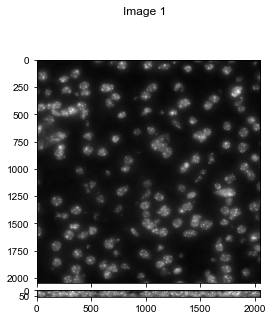

2022-01-16 16:25:39,304 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 16:25:39,304 [INFO] >>>> using GPU
2022-01-16 16:25:39,461 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 16:25:39,461 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 16:25:40,933 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 16:25:59,519 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.45it/s]
2022-01-16 16:26:00,283 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 16:26:04,791 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.80it/s]


2022-01-16 16:26:19,222 [INFO] 30%|##9       | 24/81 [00:01<00:03, 14.70it/s]


2022-01-16 16:26:23,050 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.82it/s]
2022-01-16 16:26:24,304 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 16:26:34,685 [INFO] 81%|########1 | 66/81 [00:04<00:01, 14.28it/s]


2022-01-16 16:26:47,182 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.81it/s]
2022-01-16 16:26:48,484 [INFO] network run in 68.29s
2022-01-16 16:27:14,465 [INFO] masks created in 25.98s
2022-01-16 16:27:19,091 [INFO] >>>> TOTAL TIME 99.63 sec
-- finish segmentation in 100.191s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_28_Segmentation.npy
-- removing segmentation_masks from class


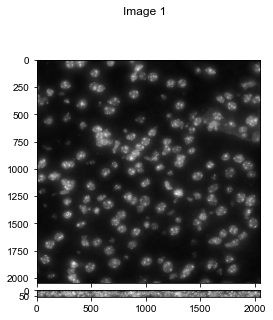

2022-01-16 16:27:32,299 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 16:27:32,299 [INFO] >>>> using GPU
2022-01-16 16:27:32,451 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 16:27:32,451 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 16:27:33,979 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 16:27:52,536 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.45it/s]
2022-01-16 16:27:53,288 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 16:27:57,770 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.87it/s]


2022-01-16 16:28:12,216 [INFO] 30%|##9       | 24/81 [00:01<00:03, 14.98it/s]


2022-01-16 16:28:16,038 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.85it/s]
2022-01-16 16:28:17,295 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 16:28:27,785 [INFO] 81%|########1 | 66/81 [00:04<00:01, 14.79it/s]


2022-01-16 16:28:40,265 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.69it/s]
2022-01-16 16:28:41,599 [INFO] network run in 68.43s
2022-01-16 16:29:07,378 [INFO] masks created in 25.78s
2022-01-16 16:29:11,954 [INFO] >>>> TOTAL TIME 99.50 sec
-- finish segmentation in 100.047s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_29_Segmentation.npy
-- removing segmentation_masks from class


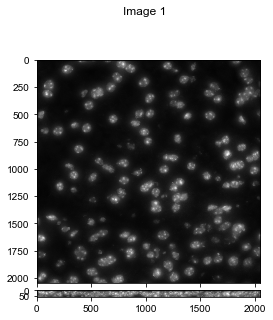

2022-01-16 16:29:25,047 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 16:29:25,047 [INFO] >>>> using GPU
2022-01-16 16:29:25,196 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 16:29:25,212 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 16:29:26,772 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 16:29:45,375 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.44it/s]
2022-01-16 16:29:46,138 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 16:29:50,659 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.89it/s]


2022-01-16 16:30:05,038 [INFO] 30%|##9       | 24/81 [00:01<00:03, 14.62it/s]


2022-01-16 16:30:08,845 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.83it/s]
2022-01-16 16:30:10,066 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 16:30:20,489 [INFO] 81%|########1 | 66/81 [00:04<00:01, 14.58it/s]


2022-01-16 16:30:33,084 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.67it/s]
2022-01-16 16:30:34,840 [INFO] network run in 68.90s
2022-01-16 16:30:59,966 [INFO] masks created in 25.13s
2022-01-16 16:31:04,637 [INFO] >>>> TOTAL TIME 99.43 sec
-- finish segmentation in 99.991s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_30_Segmentation.npy
-- removing segmentation_masks from class


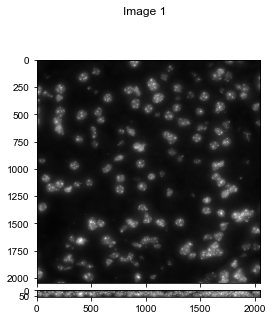

2022-01-16 16:31:17,912 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 16:31:17,912 [INFO] >>>> using GPU
2022-01-16 16:31:18,070 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 16:31:18,070 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 16:31:19,595 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 16:31:38,252 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.42it/s]
2022-01-16 16:31:39,033 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 16:31:43,565 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.85it/s]


2022-01-16 16:31:57,944 [INFO] 27%|##7       | 22/81 [00:01<00:03, 15.07it/s]


2022-01-16 16:32:01,932 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.74it/s]
2022-01-16 16:32:03,180 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 16:32:13,303 [INFO] 77%|#######6  | 62/81 [00:04<00:01, 14.10it/s]


2022-01-16 16:32:26,238 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.31it/s]
2022-01-16 16:32:27,577 [INFO] network run in 68.77s
2022-01-16 16:32:52,352 [INFO] masks created in 24.78s
2022-01-16 16:32:57,042 [INFO] >>>> TOTAL TIME 98.97 sec
-- finish segmentation in 99.537s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_31_Segmentation.npy
-- removing segmentation_masks from class


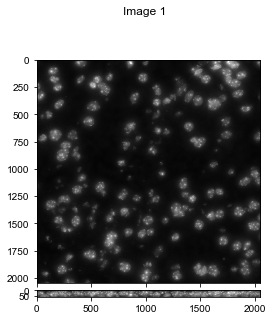

2022-01-16 16:33:10,425 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 16:33:10,425 [INFO] >>>> using GPU
2022-01-16 16:33:10,573 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 16:33:10,573 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 16:33:12,157 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 16:33:30,870 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.44it/s]
2022-01-16 16:33:31,652 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 16:33:36,202 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.94it/s]


2022-01-16 16:33:50,588 [INFO] 30%|##9       | 24/81 [00:01<00:03, 14.95it/s]


2022-01-16 16:33:54,436 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.78it/s]
2022-01-16 16:33:55,685 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 16:34:06,075 [INFO] 81%|########1 | 66/81 [00:04<00:01, 14.87it/s]


2022-01-16 16:34:18,662 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.70it/s]
2022-01-16 16:34:19,940 [INFO] network run in 68.63s
2022-01-16 16:34:45,687 [INFO] masks created in 25.75s
2022-01-16 16:34:50,407 [INFO] >>>> TOTAL TIME 99.83 sec
-- finish segmentation in 100.392s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_32_Segmentation.npy
-- removing segmentation_masks from class


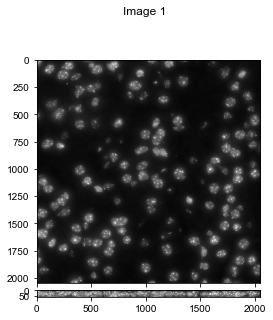

2022-01-16 16:35:03,301 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 16:35:03,301 [INFO] >>>> using GPU
2022-01-16 16:35:03,454 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 16:35:03,454 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 16:35:04,957 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 16:35:23,635 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.43it/s]
2022-01-16 16:35:24,433 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 16:35:28,966 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.91it/s]


2022-01-16 16:35:43,417 [INFO] 30%|##9       | 24/81 [00:01<00:03, 14.92it/s]


2022-01-16 16:35:47,247 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.85it/s]
2022-01-16 16:35:48,438 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 16:35:58,935 [INFO] 81%|########1 | 66/81 [00:04<00:01, 14.66it/s]


2022-01-16 16:36:11,423 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.82it/s]
2022-01-16 16:36:12,682 [INFO] network run in 68.52s
2022-01-16 16:36:38,646 [INFO] masks created in 25.96s
2022-01-16 16:36:43,460 [INFO] >>>> TOTAL TIME 100.01 sec
-- finish segmentation in 100.581s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_33_Segmentation.npy
-- removing segmentation_masks from class


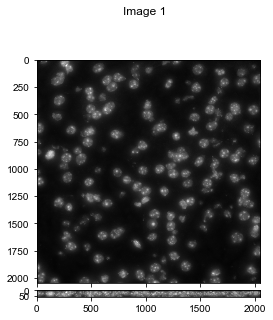

2022-01-16 16:36:56,646 [INFO] ** TORCH CUDA version installed and working. **
2022-01-16 16:36:56,646 [INFO] >>>> using GPU
2022-01-16 16:36:56,802 [INFO] ~~~ FINDING MASKS ~~~
2022-01-16 16:36:56,802 [INFO] multi-stack tiff read in as having 60 planes 2 channels
2022-01-16 16:36:58,339 [INFO] running YX: 60 planes of size (884, 884)
2022-01-16 16:37:16,975 [INFO] 100%|##########| 15/15 [00:04<00:00,  3.41it/s]
2022-01-16 16:37:17,722 [INFO] running ZY: 884 planes of size (60, 884)
2022-01-16 16:37:22,264 [INFO] 79%|#######9  | 64/81 [00:04<00:01, 14.82it/s]


2022-01-16 16:37:36,726 [INFO] 30%|##9       | 24/81 [00:01<00:03, 14.84it/s]


2022-01-16 16:37:40,584 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.72it/s]
2022-01-16 16:37:41,835 [INFO] running ZX: 884 planes of size (60, 884)
2022-01-16 16:37:52,231 [INFO] 81%|########1 | 66/81 [00:04<00:01, 14.81it/s]


2022-01-16 16:38:04,745 [INFO] 100%|##########| 81/81 [00:05<00:00, 14.74it/s]
2022-01-16 16:38:06,078 [INFO] network run in 68.55s
2022-01-16 16:38:33,395 [INFO] masks created in 27.32s
2022-01-16 16:38:38,066 [INFO] >>>> TOTAL TIME 101.26 sec
-- finish segmentation in 101.794s. 
-- saving mask into file: \\mendel\Mendel_SSD2\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Segmentation\Conv_zscan_34_Segmentation.npy
-- removing segmentation_masks from class


In [5]:
%matplotlib inline
for _filename in save_filenames:
    
    with h5py.File(_filename, "r", libver='latest') as _f:
        
        fov_id = _f.attrs['fov_id']
        
        polyt_im = _f['protein']['ims'][0]
        dapi_im = _f.attrs['dapi_im']
        
        parameters = ast.literal_eval(_f.attrs['shared_parameters']) 
        combo_spots_list = [_spots[_spots[:,0]>0] for _spots in _f['combo']['spots'][:]]
        combo_channels = [_ch.decode() for _ch in _f['combo']['channels'][:]]
        
    pixel_sizes = parameters['distance_zxy']
    single_im_size = parameters['single_im_size']

    segmentation_filename = os.path.join(segmentation_folder, 
                                         os.path.basename(_filename).replace('.hdf5', '_Segmentation.npy') )
    
    visual_tools.imshow_mark_3d_v2([dapi_im])
    seg_class = ia.segmentation_tools.cell.Cellpose_Segmentation_3D(dapi_im, polyt_im, pixel_sizes,
                                                                    save_filename=segmentation_filename,
                                                                    )

    _masks = seg_class.run()
    seg_class.save()
    seg_class.clear()
    #delattr(seg_class, 'segmentation_masks')
    #del(seg_class)

<IPython.core.display.Javascript object>


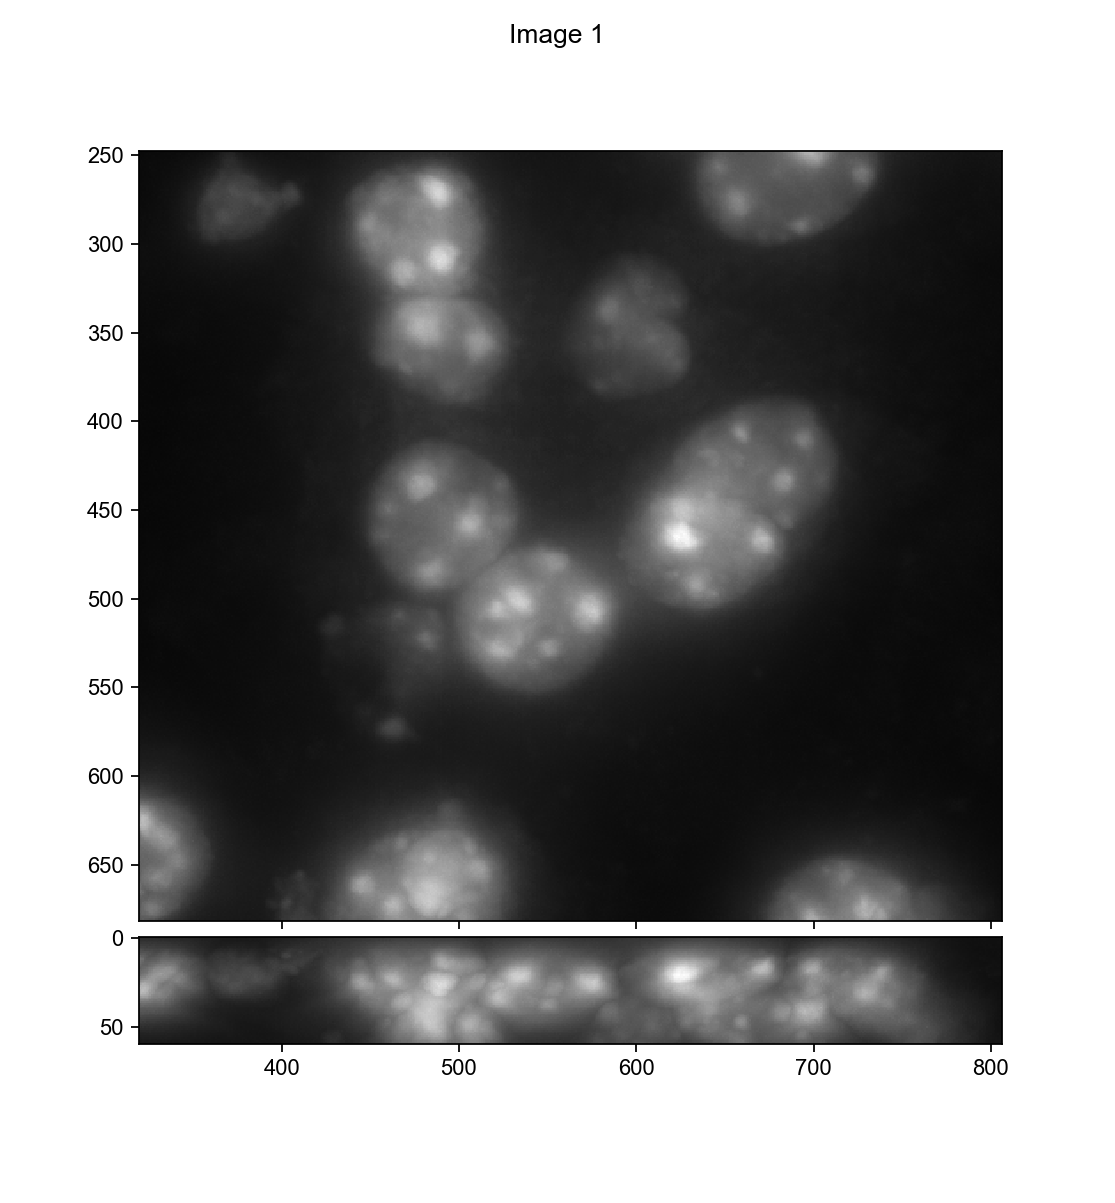

In [11]:
%matplotlib notebook
_mask = np.load(segmentation_filename)

visual_tools.imshow_mark_3d_v2([dapi_im, _mask])

## Partition spots into cellsm

In [6]:
# DNA_fov

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_5\20211108-P_brain_CTP11-1000_DNA_only',
             'save_folder':r'H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only',
             'experiment_type': 'DNA',
             'num_threads': 26,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor',
             'shared_parameters':{
                     'single_im_size':[60,2048,2048],
                     'distance_zxy': [250, 108, 108],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':True,
                     'corr_bleed':True,
                     'min_num_seeds':500,
                     'max_num_seeds': None,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':True
                 }, 
             }


for _fov_id in np.arange(5,35):
    # create fov class
    dna_fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=False,
                                              )
    
    break

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 53
- Number of field of views: 60
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20211108-P_brain_CTP11-1000_DNA_only\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
dict_keys(['H0C1', 'H1C2', 'H2C3', 'H3C4', 'H4C5', 'H5C6', 'H6C7', 'H7C8', 'H8C9', 'H9C10', 'H10C11', 'H11C12', 'H12C13', 'H13C14', 'H14C15', 'H15C16', 'H16C17', 'H17C18', 'H18C19', 'H19C20', 'H20C21', 'H21C22', 'H22C23', 'H23C24', 'H24C25', 'H25C50', 'H26C26', 'H27C27', 'H28C28', 'H29C29', 'H30C30', 'H31C31', 'H32C32', 'H33C33', 'H34C34', 'H35C35', 'H36C36', 'H37C37', 'H38C38', 'H39C39', 'H40C40', 'H41C41', 'H42C42', 'H43C43', 'H44C44', 'H45C45', 'H46C46', 'H47C47', 'H48C48', 'H49C49', 'H50P1', 'H51C38_c74', 'H52C38_c75'])
- 53 folders are found according to color-usage annotation.
+ loading fov_info from file: H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Conv_zscan_05.hdf5
++ base attributes loaded:['c

<IPython.core.display.Javascript object>


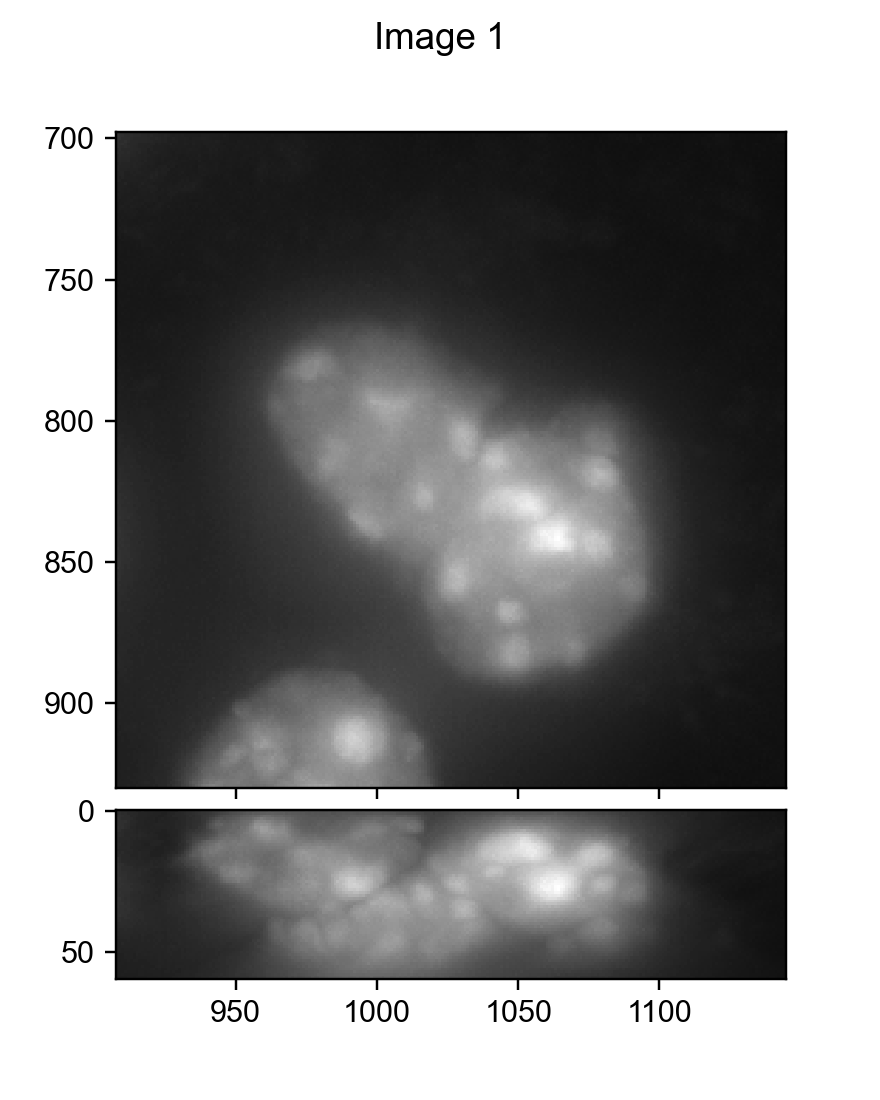

In [7]:
visual_tools.imshow_mark_3d_v2([dna_fov.dapi_im])

In [ ]:
seg_labels = dna_fov.save_filename

In [9]:
#reload(ia.meta_tools.partition_spots)

from ImageAnalysis3.meta_tools.partition_spots import Spots_Partition
from ImageAnalysis3.classes.preprocess import Spots3D

dna_fov._load_from_file('combo')

pixel_sizes = dna_fov.shared_parameters['distance_zxy']
single_im_size = dna_fov.shared_parameters['single_im_size']

all_spots_list = [Spots3D(_spots, bits=_id, pixel_sizes=pixel_sizes) for _spots, _id in zip(dna_fov.combo_spots_list, dna_fov.combo_ids)]

dapi_th = 5000
sp = Spots_Partition(new_label, "", 
                     search_radius=10, pixel_sizes=pixel_sizes,
                     save_filename=None)


cell_2_spots = {_c:{} for _c in np.unique(new_label)[np.unique(new_label)>0]}

for _spots, _id in zip(all_spots_list, dna_fov.combo_ids):
    _labels = sp.spots_to_labels(sp.segmentation_masks, _spots, sp.image_size)

    _signals = sp.spots_to_DAPI(dna_fov.dapi_im, _spots, single_im_size, search_radius=5)

    for _l in np.unique(_labels):
        if _l > 0:
            cell_2_spots[_l][_id] = _spots[(_labels==_l) * (_signals > dapi_th)]
            cell_2_spots[_l][_id].bits = _spots.bits[(_labels==_l) * (_signals > dapi_th)]

+ loading combo from file: H:\Pu_Temp\20211108-P_brain_CTP11-1000_DNA_only\Conv_zscan_05.hdf5
++ finish loading combo in 0.308s. 


NameError: name 'new_label' is not defined

## Save

In [13]:
cand_spot_folder = os.path.join(dna_fov.save_folder, 'CandSpots')
if not os.path.exists(cand_spot_folder):
    os.makedirs(cand_spot_folder)
    print(f"Creating cand_spot_folder: {cand_spot_folder}")
else:
    print(cand_spot_folder)
    
    
# save spots
for _cell_id, _spots_list in cell_2_spots.items():
    _cand_filename = os.path.join(cand_spot_folder, os.path.basename(dna_fov.save_filename).replace('.hdf5', f'_Cell-{_cell_id}_CandSpots.pkl') )
    print(_cand_filename)
    pickle.dump(_spots_list, open(_cand_filename, 'wb'))

NameError: name 'dna_fov' is not defined